In [40]:
import numpy as np
import matplotlib.pyplot as plt


In [41]:
# 读取数据
data = np.loadtxt('dollar.txt')
print(data)

[6.9609 6.9804 7.0054 7.0183 7.0496 7.0693 7.1271 7.1339 7.1765 7.1995
 7.1201 7.114  7.144  7.1554 7.167  7.1725 7.1705 7.1925 7.1951 7.2006
 7.2285 7.2134 7.2244 7.2629 7.2693 7.171  7.2244 7.2499 7.3015 7.273 ]


In [42]:
n = len(data)
A = np.array([[1, 1], [0, 1]])  
H = np.array([[1, 0]])           
Q = np.array([[1, 0], [0, 1]])   
R = np.array([[1]])             
#初始状态  
x = np.array([[data[0]], [0]])
P = np.eye(2)                    


In [43]:
#卡尔曼滤波类
class Kalman:
    def __init__(self, x, P, H):
        self.x = x 
        self.P = P 
        self.H = H
        
    def predict(self, F, Q):
        self.x = F @ self.x
        self.P = F @ self.P @ F.T + Q
    
    def update(self, z, R):
        y = z - self.H @ self.x
        S = self.H @ self.P @ self.H.T + R
        K = self.P @ self.H.T @ np.linalg.inv(S)
        self.x = self.x + K @ y
        self.P = self.P - K @ self.H @ self.P

kalman = Kalman(x=x, P=P, H=H)


In [44]:
kalman = Kalman(x=x, P=P, H=H)
x_kalman=[]

for i in range(n):
    kalman.predict(F=np.array([[1,1], [0,1]]), Q=Q)
    kalman.update(z=np.array([data[i]]), R=R)
    x_kalman.append(kalman.x[0])

print(x_kalman)

[array([6.9609]), array([6.9765]), array([7.0015982]), array([7.01830577]), array([7.04700542]), array([7.06940327]), array([7.12085267]), array([7.13824399]), array([7.17451945]), array([7.20072048]), array([7.13961854]), array([7.11548131]), array([7.13521134]), array([7.1518049]), array([7.16581195]), array([7.17332897]), array([7.17267456]), array([7.18972076]), array([7.19606747]), array([7.20130996]), array([7.22487378]), array([7.21819244]), array([7.22401964]), array([7.25685941]), array([7.27051938]), array([7.19165077]), array([7.21277031]), array([7.24239861]), array([7.29325047]), array([7.28236927])]


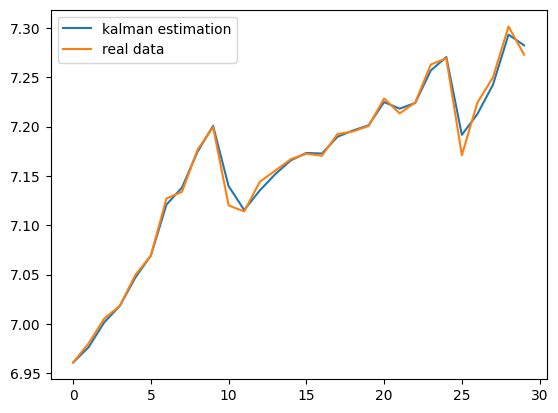

In [45]:
#可视化
plt.figure()
plt.plot(range(n), x_kalman, label = "kalman estimation")
plt.plot(range(n), data, label = "real data")
plt.legend()
plt.show()

In [46]:
# 预测未来10天
Q = np.array([[10, 0], [0, 10]]) 
x_pred=[]
for i in range(10):
    kalman.predict(F=np.array([[1,1], [0,1]]), Q=Q)
    x_pred.append(kalman.x[0])

print(x_pred)

[array([7.29251206]), array([7.30265484]), array([7.31279763]), array([7.32294041]), array([7.3330832]), array([7.34322598]), array([7.35336877]), array([7.36351155]), array([7.37365434]), array([7.38379712])]


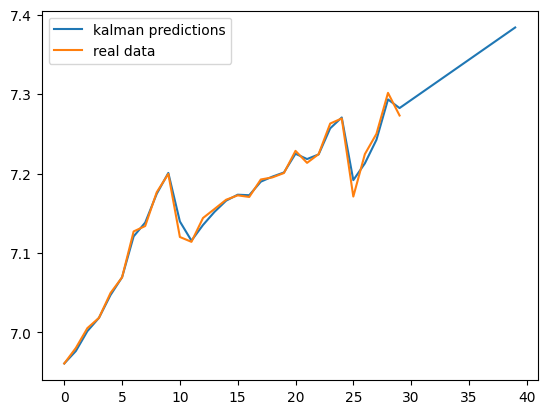

In [47]:
plt.figure()
plt.plot(range(n+10), x_kalman + x_pred, label="kalman predictions")
plt.plot(range(n), data, label='real data')
plt.legend()
plt.show()